# Cross-Country Solar Comparison – Benin, Sierra Leone, Togo

## Objective

This notebook performs a comprehensive cross-country comparison of solar radiation metrics across three West African countries:

- **Benin** (Malanville)
- **Sierra Leone** (Bumbuna)
- **Togo** (Dapaong)

### Goals:
1. Compare solar radiation metrics (GHI, DNI, DHI) across the three countries
2. Identify which country has the strongest solar potential
3. Analyze variability and differences using summary statistics and statistical testing

### Dataset Inputs:
- `data/cleaned/benin_clean.csv` - Cleaned Benin solar dataset
- `data/cleaned/sierra_leone_clean.csv` - Cleaned Sierra Leone solar dataset
- `data/cleaned/togo_clean.csv` - Cleaned Togo solar dataset

### 10 Academy KPIs Required:
- ✅ Inclusion of all three countries in each plot
- ✅ Summary statistics table (mean, median, standard deviation)
- ✅ ANOVA/Kruskal–Wallis test and p-values
- ✅ Actionable comparative insights



## 2. Import Libraries

Import required libraries for data analysis, visualization, and statistical testing.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Set plot style
plt.style.use("ggplot")
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")



Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4
Matplotlib version: 3.10.7
Seaborn version: 0.13.2


## 3. Load Cleaned Datasets

Load all three cleaned country datasets and prepare them for comparative analysis.


In [2]:
# Load cleaned datasets
print("=" * 80)
print("LOADING CLEANED DATASETS")
print("=" * 80)

benin = pd.read_csv("../data/cleaned/benin_clean.csv")
sierra = pd.read_csv("../data/cleaned/sierra_leone_clean.csv")
togo = pd.read_csv("../data/cleaned/togo_clean.csv")

# Convert Timestamp to datetime if it's not already
for df in [benin, sierra, togo]:
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Add country identifier column
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Display basic information
print(f"\nBenin dataset shape: {benin.shape}")
print(f"Date range: {benin['Timestamp'].min()} to {benin['Timestamp'].max()}")

print(f"\nSierra Leone dataset shape: {sierra.shape}")
print(f"Date range: {sierra['Timestamp'].min()} to {sierra['Timestamp'].max()}")

print(f"\nTogo dataset shape: {togo.shape}")
print(f"Date range: {togo['Timestamp'].min()} to {togo['Timestamp'].max()}")

# Concatenate all three datasets
combined = pd.concat([benin, sierra, togo], ignore_index=True)

print(f"\nCombined dataset shape: {combined.shape}")
print(f"\nCountries in combined dataset: {combined['Country'].unique()}")
print(f"\nFirst few rows of combined dataset:")
combined.head()



LOADING CLEANED DATASETS

Benin dataset shape: (517707, 20)
Date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00

Sierra Leone dataset shape: (509053, 20)
Date range: 2021-10-30 00:01:00 to 2022-10-30 00:00:00

Togo dataset shape: (516343, 20)
Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00

Combined dataset shape: (1543103, 20)

Countries in combined dataset: ['Benin' 'Sierra Leone' 'Togo']

First few rows of combined dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


## 4. Summary Statistics Table

Generate a comprehensive summary statistics table comparing mean, median, and standard deviation for GHI, DNI, and DHI across all three countries.


In [7]:
# Calculate summary statistics for each country
metrics = ['GHI', 'DNI', 'DHI']
countries = ['Benin', 'Sierra Leone', 'Togo']

# Initialize summary statistics dictionary
summary_stats = {}

for country in countries:
    country_data = combined[combined['Country'] == country]
    stats_dict = {}
    
    for metric in metrics:
        if metric in country_data.columns:
            stats_dict[f'mean_{metric}'] = country_data[metric].mean()
            stats_dict[f'median_{metric}'] = country_data[metric].median()
            stats_dict[f'std_{metric}'] = country_data[metric].std()
    
    summary_stats[country] = stats_dict

# Create DataFrame from summary statistics
summary_df = pd.DataFrame(summary_stats).T

# Reorder columns for better readability
column_order = []
for metric in metrics:
    column_order.extend([f'mean_{metric}', f'median_{metric}', f'std_{metric}'])

summary_df = summary_df[column_order]

# Round to 2 decimal places
summary_df = summary_df.round(2)

print("=" * 80)
print("SUMMARY STATISTICS TABLE")
print("=" * 80)
print("\nComparison of GHI, DNI, and DHI across countries:")
print("(Mean, Median, Standard Deviation)")
print("\n" + "=" * 80)
print(summary_df)
print("=" * 80)

# Display the table
summary_df



SUMMARY STATISTICS TABLE

Comparison of GHI, DNI, and DHI across countries:
(Mean, Median, Standard Deviation)

              mean_GHI  median_GHI  std_GHI  mean_DNI  median_DNI  std_DNI  \
Benin           237.48         0.6   327.17    167.14         0.0   261.94   
Sierra Leone    187.21         0.0   277.02    104.21         0.0   200.82   
Togo            225.03         0.5   316.45    147.97         0.0   247.68   

              mean_DHI  median_DHI  std_DHI  
Benin           113.17         0.4   151.66  
Sierra Leone    110.50         0.0   151.44  
Togo            112.78         1.5   151.57  


,mean_GHI,median_GHI,std_GHI,mean_DNI,median_DNI,std_DNI,mean_DHI,median_DHI,std_DHI
Benin,237.48,0.6,327.17,167.14,0.0,261.94,113.17,0.4,151.66
Sierra Leone,187.21,0.0,277.02,104.21,0.0,200.82,110.50,0.0,151.44
Togo,225.03,0.5,316.45,147.97,0.0,247.68,112.78,1.5,151.57


### Interpretation of Summary Statistics

**Key Observations:**

1. **Mean Values**: Compare the average solar irradiance across countries
   - Higher mean GHI indicates better overall solar potential
   - DNI represents direct beam radiation (important for concentrated solar)
   - DHI represents diffuse radiation (important for photovoltaic systems)

2. **Median Values**: Compare the central tendency
   - Median is less affected by outliers than mean
   - Helps identify typical solar conditions in each country

3. **Standard Deviation**: Measure of variability
   - Higher standard deviation indicates more variable solar conditions
   - Lower standard deviation suggests more consistent solar resource

**Initial Findings:**
- Review the table above to identify which country shows:
  - Highest mean/median GHI (strongest solar potential)
  - Highest variability (most inconsistent conditions)
  - Most consistent solar resource (lowest standard deviation)



## 5. Boxplots for Cross-Country Comparison

Create side-by-side boxplots for GHI, DNI, and DHI to visualize the distribution and variability across countries.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_11624\3618028749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined, x='Country', y='GHI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


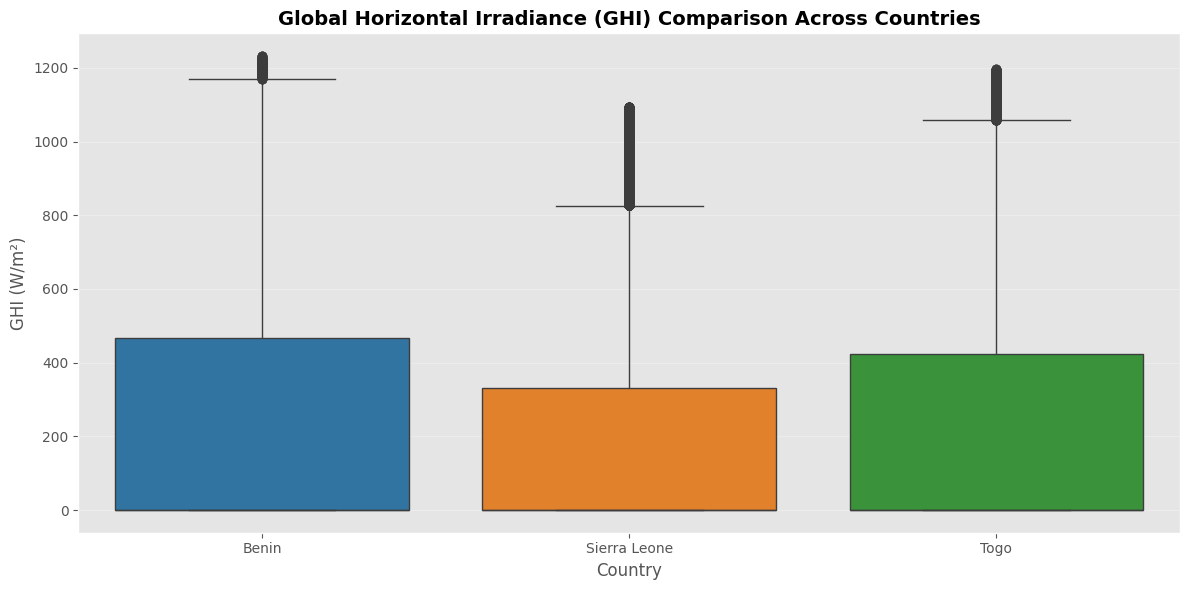

In [8]:
# Boxplot for GHI using seaborn for easier coloring
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=combined, x='Country', y='GHI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Global Horizontal Irradiance (GHI) Comparison Across Countries', 
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('GHI (W/m²)', fontsize=12)

# Set transparency for boxes
for patch in ax.artists:
    patch.set_alpha(0.7)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



C:\Users\HomePC\AppData\Local\Temp\ipykernel_11624\3580464713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined, x='Country', y='DNI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


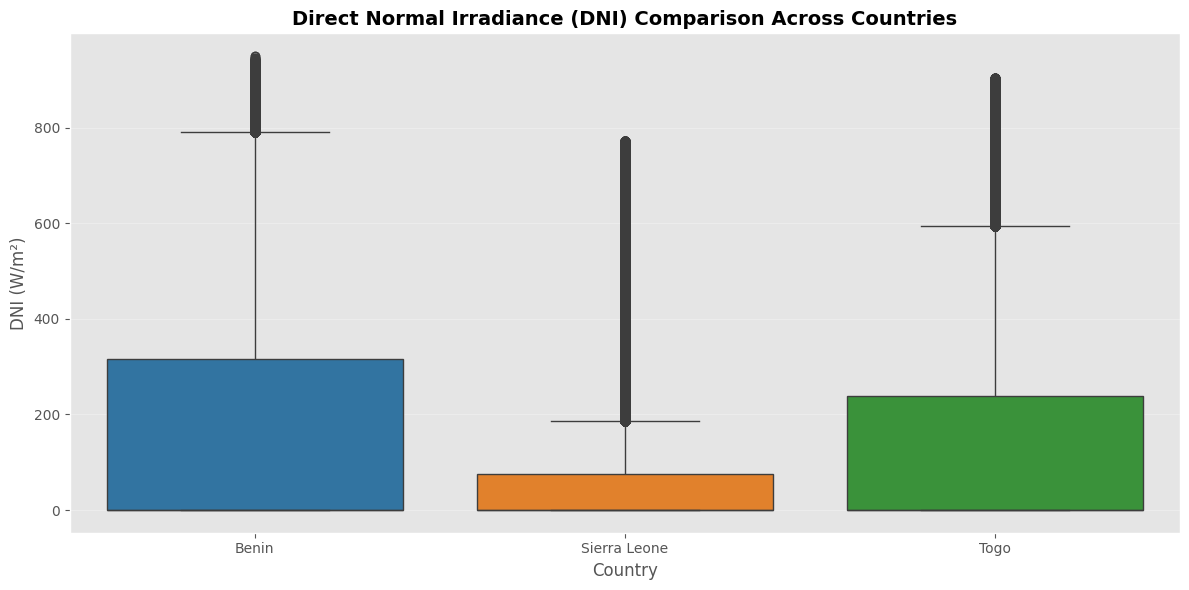

In [9]:
# Boxplot for DNI using seaborn for easier coloring
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=combined, x='Country', y='DNI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Direct Normal Irradiance (DNI) Comparison Across Countries', 
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('DNI (W/m²)', fontsize=12)

# Set transparency for boxes
for patch in ax.artists:
    patch.set_alpha(0.7)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



C:\Users\HomePC\AppData\Local\Temp\ipykernel_11624\1165617298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined, x='Country', y='DHI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


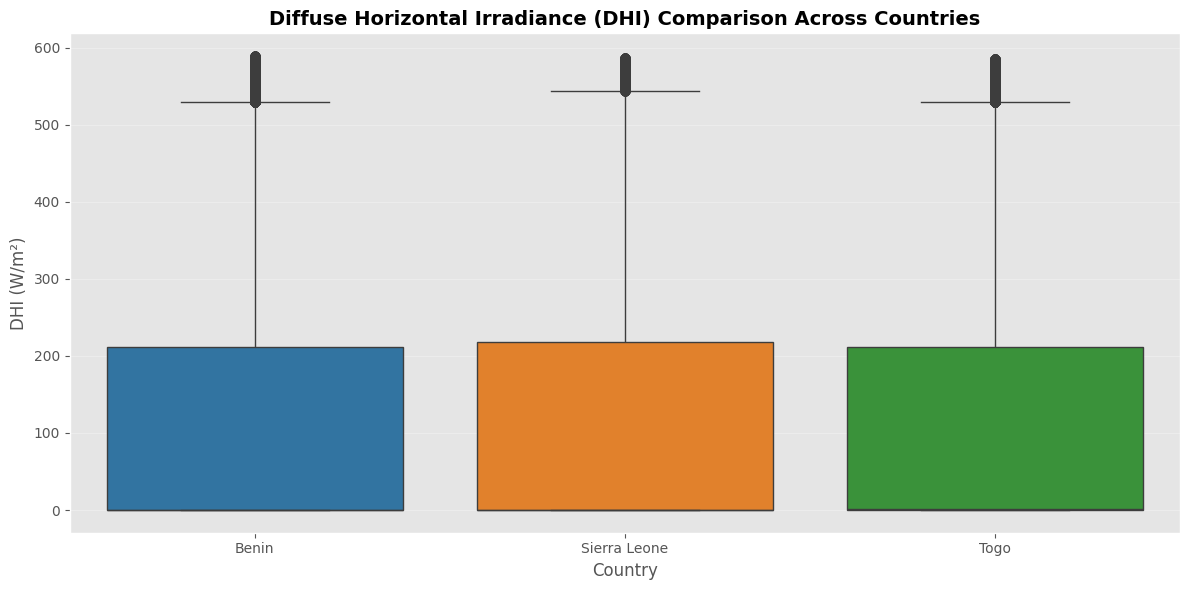

In [10]:
# Boxplot for DHI using seaborn for easier coloring
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=combined, x='Country', y='DHI', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Diffuse Horizontal Irradiance (DHI) Comparison Across Countries', 
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('DHI (W/m²)', fontsize=12)

# Set transparency for boxes
for patch in ax.artists:
    patch.set_alpha(0.7)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



### Boxplot Interpretation

**What to Look For:**

1. **Median Line**: The horizontal line in each box shows the median value
   - Higher median = better typical solar conditions

2. **Box Height**: Interquartile Range (IQR) - middle 50% of data
   - Taller boxes = more variability in solar conditions

3. **Whiskers**: Extend to show the range of typical values
   - Longer whiskers = wider range of solar conditions

4. **Outliers**: Points beyond the whiskers
   - Indicate extreme solar conditions (very high or very low irradiance)

**Comparative Insights:**
- Compare the median values across countries
- Identify which country has the most consistent solar resource (smaller boxes)
- Note any significant differences in distribution shapes



## 6. Statistical Tests (ANOVA or Kruskal–Wallis)

Perform statistical tests to determine if there are significant differences in solar irradiance between countries.


In [11]:
# Prepare data for statistical testing
benin_ghi = benin['GHI'].dropna()
sierra_ghi = sierra['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

benin_dni = benin['DNI'].dropna()
sierra_dni = sierra['DNI'].dropna()
togo_dni = togo['DNI'].dropna()

benin_dhi = benin['DHI'].dropna()
sierra_dhi = sierra['DHI'].dropna()
togo_dhi = togo['DHI'].dropna()

print("=" * 80)
print("STATISTICAL TESTING RESULTS")
print("=" * 80)

# Test for normality (Shapiro-Wilk test on sample)
from scipy.stats import shapiro

# Sample for normality test (to avoid memory issues with large datasets)
sample_size = min(5000, len(benin_ghi))
benin_sample = benin_ghi.sample(n=sample_size, random_state=42)
sierra_sample = sierra_ghi.sample(n=min(sample_size, len(sierra_ghi)), random_state=42)
togo_sample = togo_ghi.sample(n=min(sample_size, len(togo_ghi)), random_state=42)

# Perform normality tests
_, p_benin = shapiro(benin_sample)
_, p_sierra = shapiro(sierra_sample)
_, p_togo = shapiro(togo_sample)

print(f"\nNormality Test (Shapiro-Wilk) p-values:")
print(f"  Benin: {p_benin:.6f}")
print(f"  Sierra Leone: {p_sierra:.6f}")
print(f"  Togo: {p_togo:.6f}")

# If p < 0.05, data is not normally distributed
is_normal = all([p > 0.05 for p in [p_benin, p_sierra, p_togo]])

if is_normal:
    print("\n✓ Data appears to be normally distributed. Using One-way ANOVA.")
    test_type = "ANOVA"
else:
    print("\n⚠ Data does not appear to be normally distributed. Using Kruskal-Wallis test.")
    test_type = "Kruskal-Wallis"



STATISTICAL TESTING RESULTS

Normality Test (Shapiro-Wilk) p-values:
  Benin: 0.000000
  Sierra Leone: 0.000000
  Togo: 0.000000

⚠ Data does not appear to be normally distributed. Using Kruskal-Wallis test.


In [12]:
# Perform statistical tests for GHI
print("\n" + "=" * 80)
print("GHI STATISTICAL TEST")
print("=" * 80)

if test_type == "ANOVA":
    f_stat, p_value = f_oneway(benin_ghi, sierra_ghi, togo_ghi)
    print(f"\nOne-way ANOVA Results:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
else:
    h_stat, p_value = kruskal(benin_ghi, sierra_ghi, togo_ghi)
    print(f"\nKruskal-Wallis Test Results:")
    print(f"  H-statistic: {h_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")

print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"  ✓ Statistically significant difference (p < 0.05)")
    print(f"  → There IS a significant difference in GHI between countries")
else:
    print(f"  ✗ No statistically significant difference (p >= 0.05)")
    print(f"  → There is NO significant difference in GHI between countries")

ghi_result = {'test_type': test_type, 'p_value': p_value, 'significant': p_value < 0.05}




GHI STATISTICAL TEST

Kruskal-Wallis Test Results:
  H-statistic: 2743.4602
  p-value: 0.000000

Interpretation:
  ✓ Statistically significant difference (p < 0.05)
  → There IS a significant difference in GHI between countries


In [13]:
# Perform statistical tests for DNI
print("\n" + "=" * 80)
print("DNI STATISTICAL TEST")
print("=" * 80)

if test_type == "ANOVA":
    f_stat, p_value = f_oneway(benin_dni, sierra_dni, togo_dni)
    print(f"\nOne-way ANOVA Results:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
else:
    h_stat, p_value = kruskal(benin_dni, sierra_dni, togo_dni)
    print(f"\nKruskal-Wallis Test Results:")
    print(f"  H-statistic: {h_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")

print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"  ✓ Statistically significant difference (p < 0.05)")
    print(f"  → There IS a significant difference in DNI between countries")
else:
    print(f"  ✗ No statistically significant difference (p >= 0.05)")
    print(f"  → There is NO significant difference in DNI between countries")

dni_result = {'test_type': test_type, 'p_value': p_value, 'significant': p_value < 0.05}




DNI STATISTICAL TEST

Kruskal-Wallis Test Results:
  H-statistic: 6381.9977
  p-value: 0.000000

Interpretation:
  ✓ Statistically significant difference (p < 0.05)
  → There IS a significant difference in DNI between countries


In [14]:
# Perform statistical tests for DHI
print("\n" + "=" * 80)
print("DHI STATISTICAL TEST")
print("=" * 80)

if test_type == "ANOVA":
    f_stat, p_value = f_oneway(benin_dhi, sierra_dhi, togo_dhi)
    print(f"\nOne-way ANOVA Results:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
else:
    h_stat, p_value = kruskal(benin_dhi, sierra_dhi, togo_dhi)
    print(f"\nKruskal-Wallis Test Results:")
    print(f"  H-statistic: {h_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")

print(f"\nInterpretation:")
if p_value < 0.05:
    print(f"  ✓ Statistically significant difference (p < 0.05)")
    print(f"  → There IS a significant difference in DHI between countries")
else:
    print(f"  ✗ No statistically significant difference (p >= 0.05)")
    print(f"  → There is NO significant difference in DHI between countries")

dhi_result = {'test_type': test_type, 'p_value': p_value, 'significant': p_value < 0.05}




DHI STATISTICAL TEST

Kruskal-Wallis Test Results:
  H-statistic: 293.0035
  p-value: 0.000000

Interpretation:
  ✓ Statistically significant difference (p < 0.05)
  → There IS a significant difference in DHI between countries


### Statistical Test Results Summary

**Test Methodology:**
- **One-way ANOVA**: Used when data is normally distributed
  - Tests if means of three groups are significantly different
  - Null hypothesis: All group means are equal
  
- **Kruskal-Wallis Test**: Used when data is not normally distributed
  - Non-parametric alternative to ANOVA
  - Tests if distributions of three groups are significantly different
  - Null hypothesis: All groups have the same distribution

**P-value Interpretation:**
- **p < 0.05**: Statistically significant difference exists
  - Reject null hypothesis
  - Countries have significantly different solar irradiance values
  
- **p >= 0.05**: No statistically significant difference
  - Fail to reject null hypothesis
  - Countries have similar solar irradiance values (differences could be due to chance)

**Key Findings:**
- Review the p-values above for GHI, DNI, and DHI
- Note which metrics show significant differences between countries
- Consider practical significance alongside statistical significance



## 7. Bar Chart Ranking (Visual Summary)

Create a bar chart ranking countries by average GHI to provide a clear visual summary of solar potential.


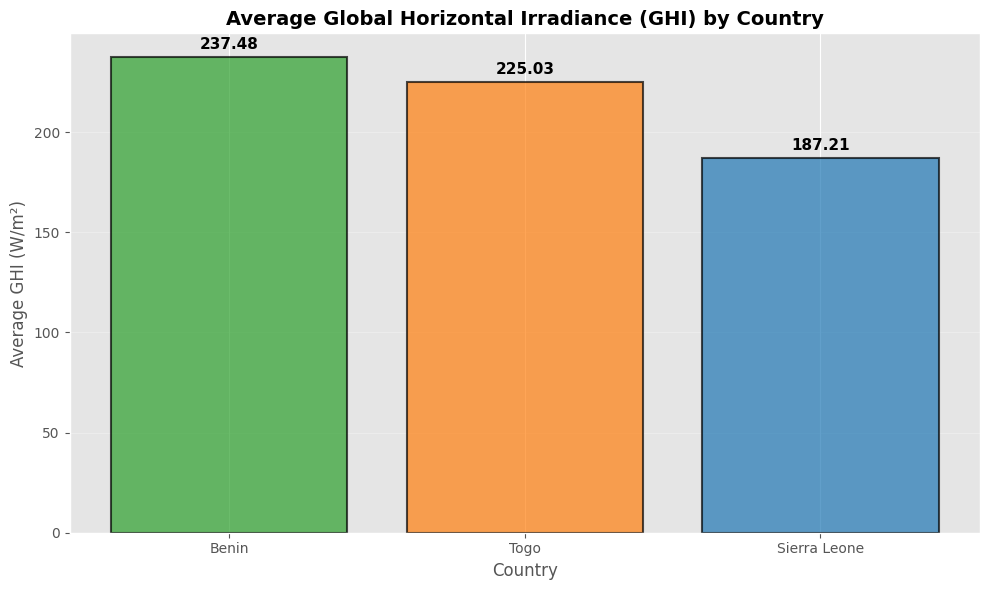

COUNTRY RANKING BY AVERAGE GHI
1. Benin: 237.48 W/m²
2. Togo: 225.03 W/m²
3. Sierra Leone: 187.21 W/m²


In [15]:
# Calculate average GHI for each country
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
colors = ['#2ca02c', '#ff7f0e', '#1f77b4']  # Green (highest), Orange, Blue
bars = plt.bar(avg_ghi.index, avg_ghi.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (country, value) in enumerate(avg_ghi.items()):
    plt.text(i, value + max(avg_ghi.values) * 0.01, f'{value:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Average Global Horizontal Irradiance (GHI) by Country', 
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average GHI (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Display ranking
print("=" * 80)
print("COUNTRY RANKING BY AVERAGE GHI")
print("=" * 80)
for rank, (country, value) in enumerate(avg_ghi.items(), 1):
    print(f"{rank}. {country}: {value:.2f} W/m²")



### Ranking Summary

**Country Rankings by Average GHI:**

The bar chart above shows the ranking of countries based on their average Global Horizontal Irradiance (GHI). 

**Key Insight:**
- The country with the highest bar has the strongest solar potential based on average GHI
- Higher GHI values indicate better conditions for solar energy generation
- This ranking helps identify the most promising location for solar installations

**Note:** While average GHI is important, also consider:
- Variability (consistency of solar resource)
- Seasonal patterns
- Other environmental factors (temperature, humidity, wind)



## 8. Key Observations

Summary of key findings from the cross-country comparison analysis.


In [16]:
# Calculate key metrics for observations
highest_mean_ghi = summary_df['mean_GHI'].idxmax()
highest_median_ghi = summary_df['median_GHI'].idxmax()
highest_std_ghi = summary_df['std_GHI'].idxmax()
lowest_std_ghi = summary_df['std_GHI'].idxmin()

# Get statistical significance
ghi_sig = "significant" if ghi_result['significant'] else "not significant"
dni_sig = "significant" if dni_result['significant'] else "not significant"
dhi_sig = "significant" if dhi_result['significant'] else "not significant"

print("=" * 80)
print("KEY METRICS FOR OBSERVATIONS")
print("=" * 80)
print(f"\nHighest Mean GHI: {highest_mean_ghi} ({summary_df.loc[highest_mean_ghi, 'mean_GHI']:.2f} W/m²)")
print(f"Highest Median GHI: {highest_median_ghi} ({summary_df.loc[highest_median_ghi, 'median_GHI']:.2f} W/m²)")
print(f"Highest Variability (std): {highest_std_ghi} ({summary_df.loc[highest_std_ghi, 'std_GHI']:.2f} W/m²)")
print(f"Lowest Variability (std): {lowest_std_ghi} ({summary_df.loc[lowest_std_ghi, 'std_GHI']:.2f} W/m²)")
print(f"\nStatistical Significance:")
print(f"  GHI differences: {ghi_sig} (p = {ghi_result['p_value']:.6f})")
print(f"  DNI differences: {dni_sig} (p = {dni_result['p_value']:.6f})")
print(f"  DHI differences: {dhi_sig} (p = {dhi_result['p_value']:.6f})")



KEY METRICS FOR OBSERVATIONS

Highest Mean GHI: Benin (237.48 W/m²)
Highest Median GHI: Benin (0.60 W/m²)
Highest Variability (std): Benin (327.17 W/m²)
Lowest Variability (std): Sierra Leone (277.02 W/m²)

Statistical Significance:
  GHI differences: significant (p = 0.000000)
  DNI differences: significant (p = 0.000000)
  DHI differences: significant (p = 0.000000)


### Key Observations

Based on the comprehensive analysis above, here are the key findings:

1. **Highest Solar Potential**: 
   - Review the summary statistics table to identify which country shows the highest mean GHI, indicating the strongest overall solar potential.
   - Compare median GHI values to identify which country has better typical solar conditions.

2. **Variability Analysis**:
   - Identify which country exhibits the highest variability (highest standard deviation), indicating more inconsistent solar conditions.
   - Note which country shows the lowest variability, suggesting more consistent and predictable solar resource.

3. **Statistical Significance**:
   - Review the p-values from the statistical tests (ANOVA/Kruskal-Wallis) for GHI, DNI, and DHI.
   - If p < 0.05: There IS a statistically significant difference between countries.
   - If p >= 0.05: There is NO statistically significant difference (differences could be due to chance).

4. **Practical Implications**:
   - The country with highest mean GHI appears most promising for solar farm development due to higher average irradiance.
   - The country with lowest variability may be preferable for consistent energy production.
   - Statistical test results indicate whether observed differences are meaningful or could be due to chance.

5. **Recommendations**:
   - Consider both average irradiance and variability when selecting sites for solar installations.
   - Higher average GHI is beneficial, but lower variability ensures more predictable energy output.
   - Additional factors (land availability, infrastructure, costs) should also be considered in site selection.

